In [1]:
# We start by importing the libraries we'll use today
import numpy as np
import torch
import torchvision


In [2]:

trainingdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=True,download=True,transform=torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=False,download=True,transform=torchvision.transforms.ToTensor())

In [3]:
print(len(trainingdata))
print(len(testdata))

60000
10000


In [4]:

image, label = trainingdata[0]
print(image.shape, label)
     

torch.Size([1, 28, 28]) 9


In [5]:
print(image.squeeze().shape)
     

torch.Size([28, 28])


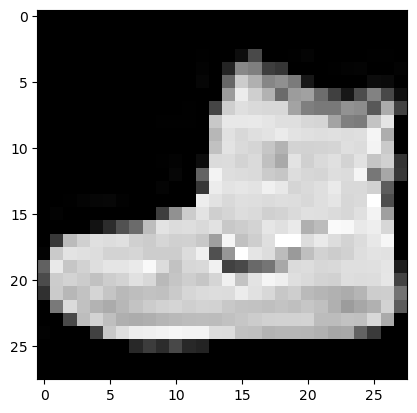

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(image.squeeze(), cmap=plt.cm.gray)

In [7]:
trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=64,shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=64,shuffle=False)

In [8]:

print(len(trainDataLoader))
print(len(testDataLoader))

938
157


In [9]:

print(len(trainDataLoader) * 64) # batch_size from above
print(len(testDataLoader) * 64)

60032
10048


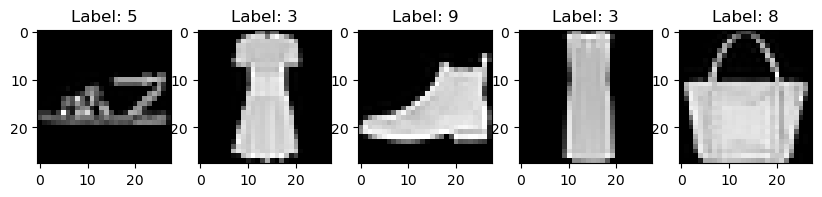

In [10]:
images, labels = next(iter(trainDataLoader))

plt.figure(figsize=(10,4))
for index in np.arange(0,5):
  plt.subplot(1,5,index+1)
  plt.title(f'Label: {labels[index].item()}')
  plt.imshow(images[index].squeeze(),cmap=plt.cm.gray)

In [22]:
class Q4(torch.nn.Module):
    
    def __init__(self):
        super(Q4, self).__init__()
        self.flatten = torch.nn.Flatten()
        self.layer_256 = torch.nn.Linear(28*28, 256)
        self.layer_128 = torch.nn.Linear(256, 128)
        self.layer_64 = torch.nn.Linear(128, 64)
        self.layer_10 = torch.nn.Linear(64, 10)
        self.relu = torch.nn.ReLU()
  
    def forward(self, x):
        input = self.flatten(x)
        hidden1 = self.layer_256(input)
        hidden1 = self.relu(hidden1)

        hidden2 = self.layer_128(hidden1)
        hidden2 = self.relu(hidden2)

        hidden3 = self.layer_64(hidden2)
        hidden3 = self.relu(hidden3)

        out = self.layer_10(hidden3)
        return out

model = Q4().cuda() # Step 1: architecture
loss = torch.nn.CrossEntropyLoss() # Step 2: loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # Step 3: training method

In [24]:

train_loss_history = []
test_loss_history = []

for epoch in range(30):
  train_loss = 0.0
  test_loss = 0.0
  
  model.train()
  for i, data in enumerate(trainDataLoader):
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    optimizer.zero_grad() # zero out any gradient values from the previous iteration
    predicted_output = model(images) # forward propagation  
    fit = loss(predicted_output, labels)  # calculate our measure of goodness
    fit.backward() # backpropagation
    optimizer.step() # update the weights of our trainable parameters
    train_loss += fit.item()

  model.eval()
  for i, data in enumerate(testDataLoader):
    with torch.no_grad():
      images, labels = data
      images = images.cuda()
      labels = labels.cuda()
      predicted_output = model(images)
      fit = loss(predicted_output, labels)
      test_loss += fit.item()
  train_loss = train_loss / len(trainDataLoader)
  test_loss = test_loss / len(testDataLoader)
  train_loss_history += [train_loss]
  test_loss_history += [test_loss]
  print(f'Epoch {epoch}, Train loss {train_loss}, Test loss {test_loss}')
     

Epoch 0, Train loss 1.8851236959001911, Test loss 1.1468375048060326
Epoch 1, Train loss 0.9027031342357968, Test loss 0.7940738267579656
Epoch 2, Train loss 0.7005499075534247, Test loss 0.6841393433938361
Epoch 3, Train loss 0.6096641473106738, Test loss 0.6012845614533515
Epoch 4, Train loss 0.5586892386743509, Test loss 0.5646463009961851
Epoch 5, Train loss 0.5232571655117881, Test loss 0.5468578911890649
Epoch 6, Train loss 0.4977364547725425, Test loss 0.5128946148665847
Epoch 7, Train loss 0.478597789383265, Test loss 0.5040714452221136
Epoch 8, Train loss 0.4614623318761905, Test loss 0.5224246954082683
Epoch 9, Train loss 0.44735745420016204, Test loss 0.48066431416827404
Epoch 10, Train loss 0.4342437732194278, Test loss 0.47391947876116275
Epoch 11, Train loss 0.422077221148558, Test loss 0.4660231436893439
Epoch 12, Train loss 0.4108975721257074, Test loss 0.4868762488387952
Epoch 13, Train loss 0.40235980379301856, Test loss 0.4446343693194116
Epoch 14, Train loss 0.39376

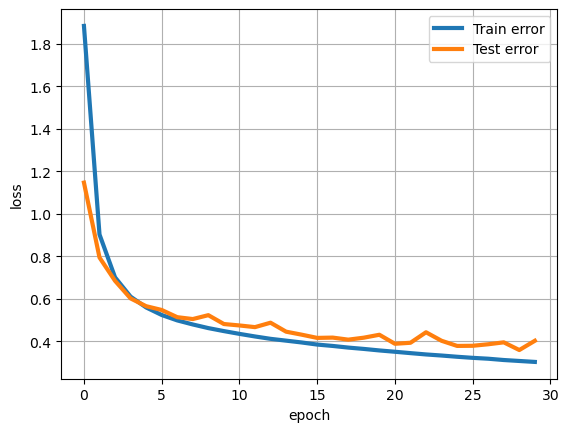

In [26]:
plt.plot(range(30),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(range(30),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()
plt.show()

In [27]:

predicted_outputs = model(images)
predicted_classes = torch.max(predicted_outputs, 1)[1]
print('Predicted:', predicted_classes)
fit = loss(predicted_output, labels)
print('True labels:', labels)
print(fit.item())

Predicted: tensor([3, 0, 7, 5, 8, 2, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5], device='cuda:0')
True labels: tensor([3, 2, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5], device='cuda:0')
0.1662137657403946


Text(0.5, 1.0, 'Pred: 0, True: 2')

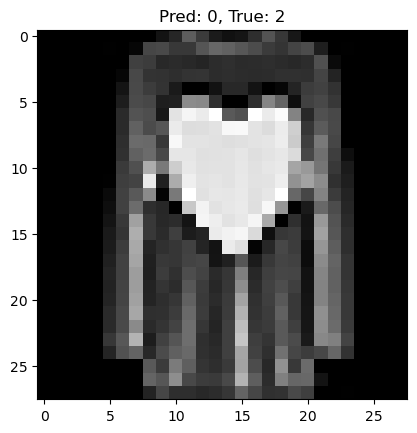

In [28]:
plt.imshow(images[1].squeeze().cpu(), cmap=plt.cm.gray)
plt.title(f'Pred: {predicted_classes[1].item()}, True: {labels[1].item()}')
     